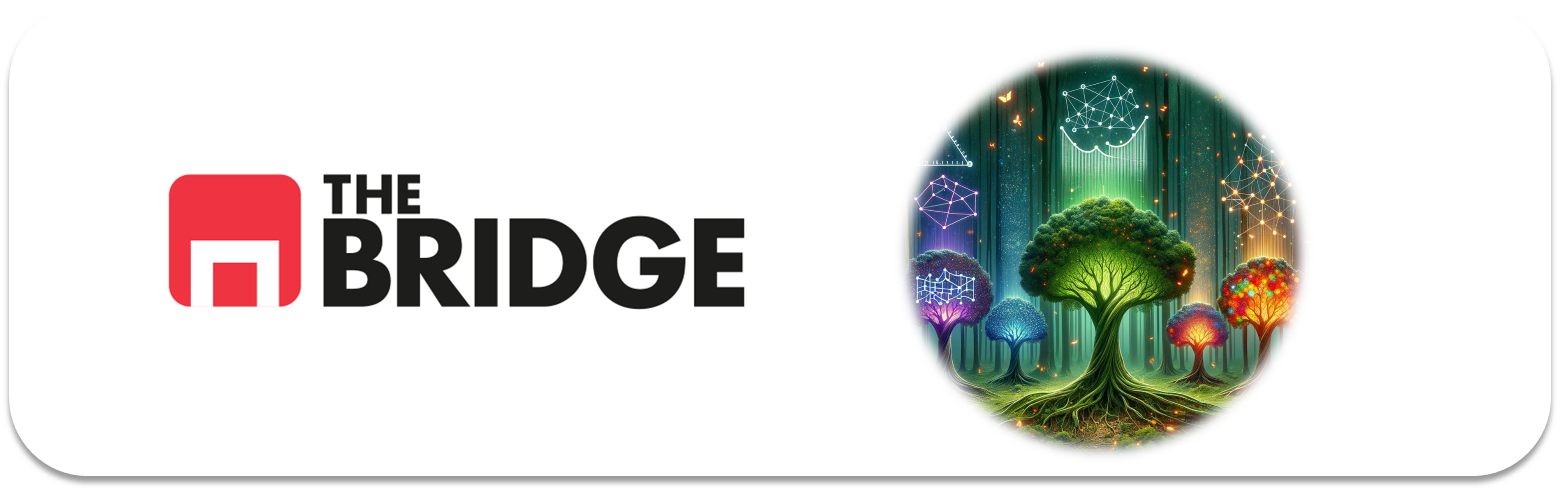

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

1. Entender el problema de negocio y tasladarlo a un problema técnico: supervisado, regresión o clasificación.
2. Obtener datos
3. Visualización, ojeo de los datos
4. Limpieza (no puedo imputar nulos o valores que tengan que considerar agregaciones)
5. Train/Test split
6. Sobre el train ya estudio el targetm la bivarianza del target con las posibles features (miniEDA) -> Lista de potenciales features
7. Tratar las features -> categoricas a numericas, numericas las escalo y antes las transformo
8. Seleccion de un conjunto de modelos
9. Los entrenaré con CV -> compararé y me quedaré el mejor
10. Optimización de hiperparametros de ese mejor  

    ALTERNATIVAMENTE  
9b. Optimiza los hiperparametros de todos los modelos a considerar    
10b. Comparar los optimizados y quedarme con el mejor  

In [ ]:
''' 
Dadas las características de los datos y el objetivo de predecir si el cliente se suscribirá a un depósito a plazo, 
este problema encaja en la categoría de un problema supervisado de clasificación.
'''

In [87]:
df = pd.read_csv('data/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [88]:
df.rename(columns = {'y': 'target'}, inplace=True)

In [89]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

X_train = train_set.drop("target", axis = 1)
X_test = test_set.drop("target", axis = 1)
y_train = train_set["target"]
y_test = test_set["target"]

In [98]:
y_train.replace({'no': 0, 'yes': 1}, inplace=True)
y_test.replace({'no': 0, 'yes': 1}, inplace=True)

In [90]:
features_cat = ['default', 'marital', 'education', 'job', 'housing', 'loan', 'poutcome', 'contact', 'month']
features_num = ['age','balance','day','duration','campaign','pdays','previous']

In [99]:
train_set['target'].value_counts(normalize = True)

target
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [92]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [93]:
def encoderonehot (train_set:pd.DataFrame, features_cat:list):
    onehot = OneHotEncoder(sparse_output= False, drop='first')
    data = onehot.fit_transform(train_set[features_cat])
    new_features = onehot.get_feature_names_out()
    train_set[new_features] = data
    train_set.drop(columns=features_cat, axis=1, inplace=True)
    return train_set

In [94]:
lr_clf = LogisticRegression
tree_clf = DecisionTreeClassifier

X_train=encoderonehot(X_train,features_cat)
X_test=encoderonehot(X_test,features_cat)

In [95]:
X_train

,age,balance,day,duration,campaign,pdays,previous,default_yes,marital_married,marital_single,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3344,41,849,15,72,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17965,49,1415,30,269,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18299,42,3842,31,130,4,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10221,37,-119,11,375,11,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32192,56,3498,15,264,2,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44732,23,508,8,210,1,92,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38158,34,1317,15,239,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
860,33,165,7,111,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

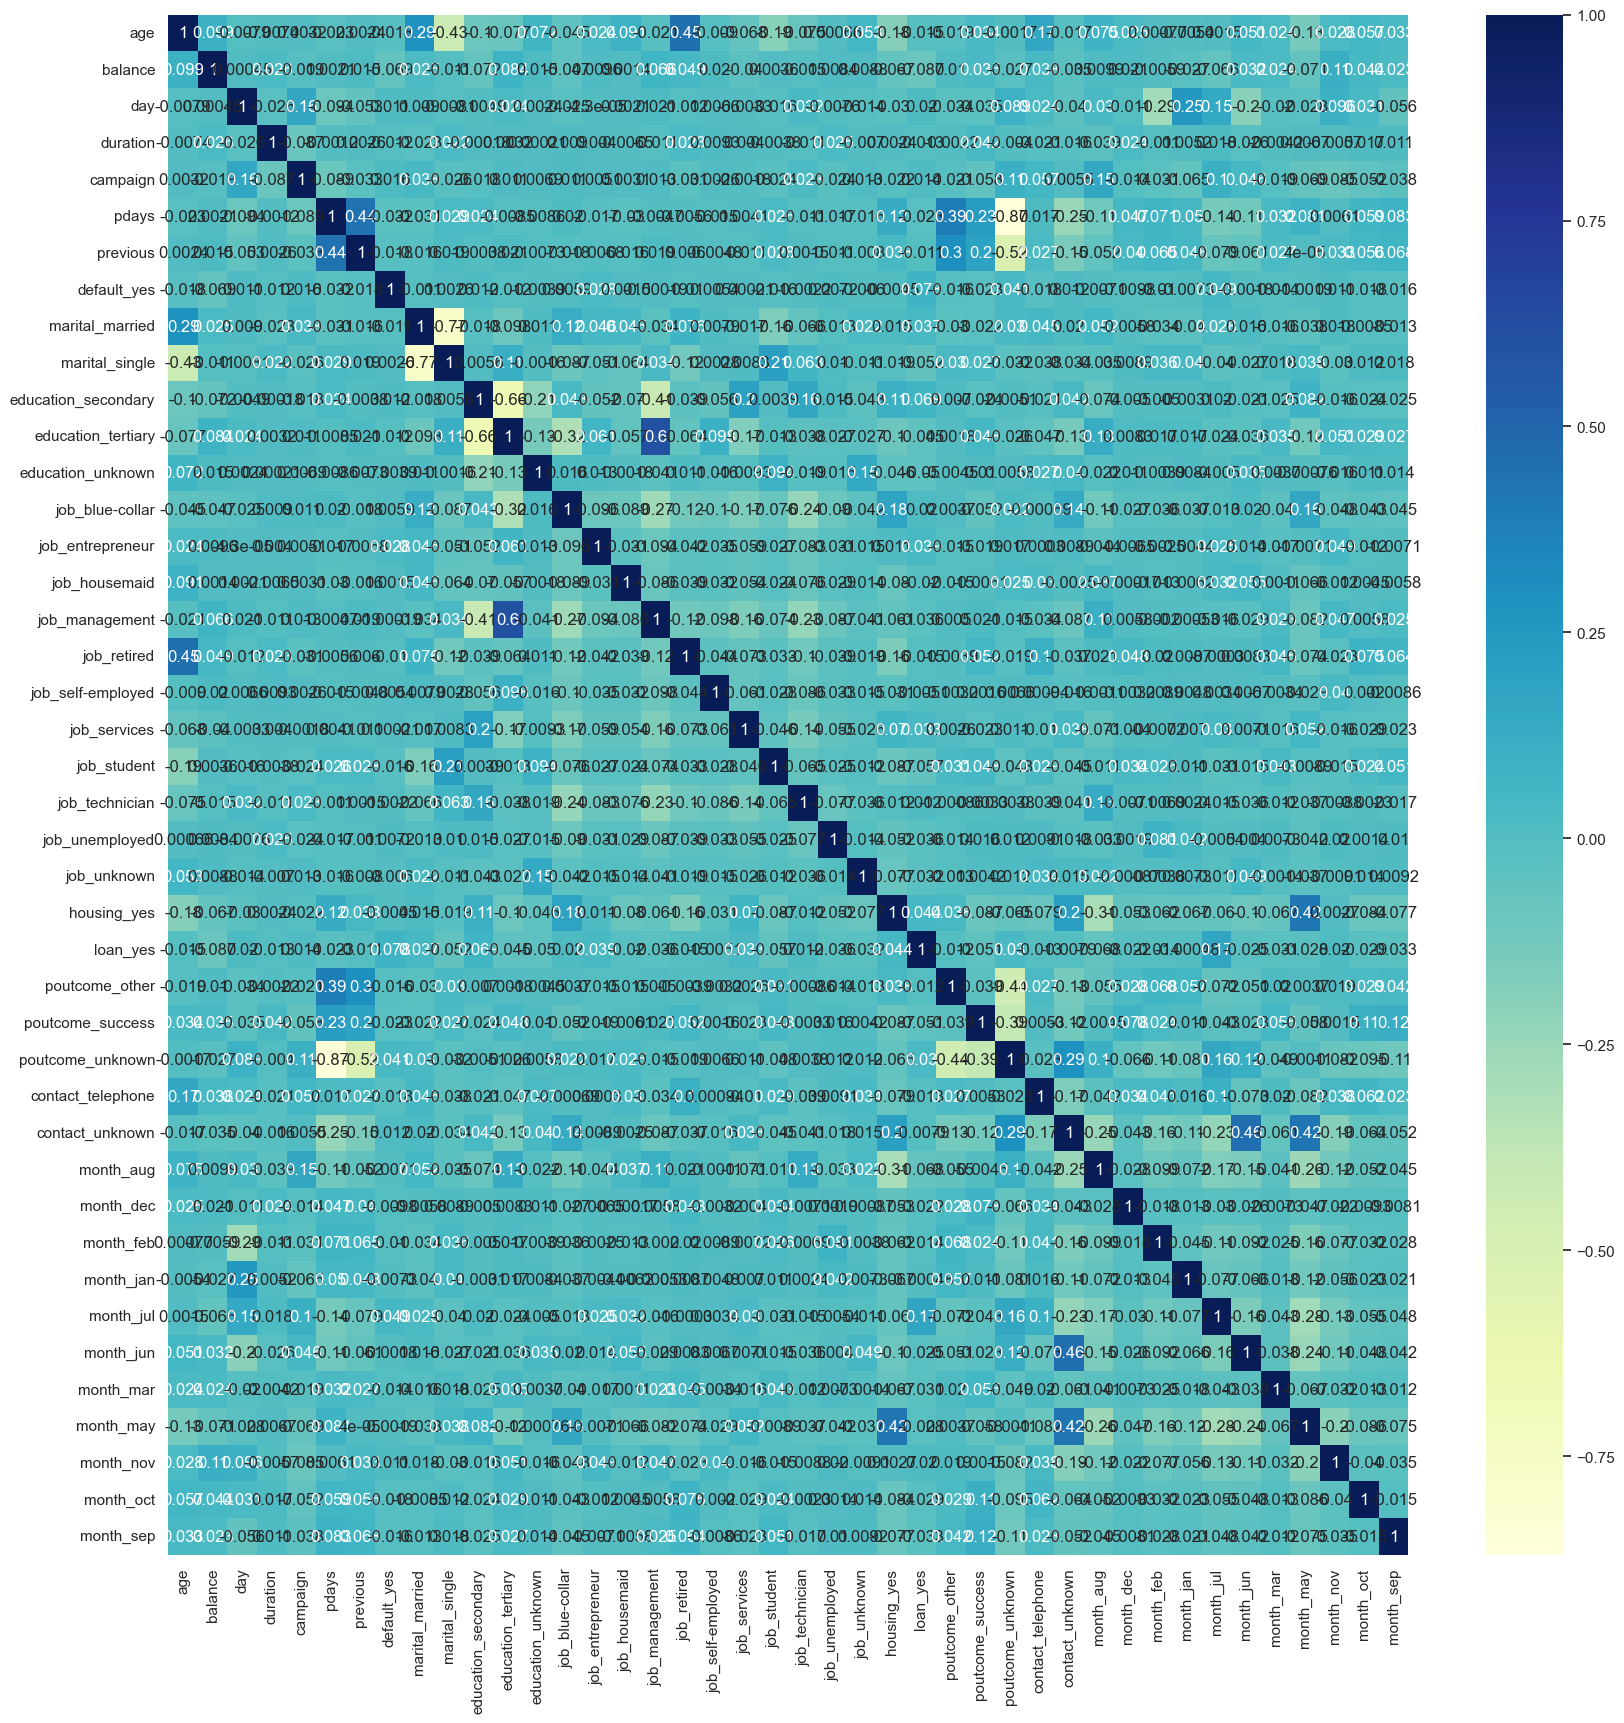

In [96]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(X_train.corr(),cmap="YlGnBu", annot=True);
plt.show

In [100]:
correlations = X_train.corrwith(y_train)
correlations.abs().sort_values(ascending=False)

duration               0.393402
poutcome_success       0.305084
poutcome_unknown       0.169549
contact_unknown        0.153470
housing_yes            0.140234
month_oct              0.130183
month_mar              0.127642
month_sep              0.124370
pdays                  0.105742
month_may              0.104700
previous               0.092051
month_dec              0.077569
job_retired            0.076440
job_student            0.073606
campaign               0.072571
job_blue-collar        0.071767
loan_yes               0.066708
education_tertiary     0.065868
marital_single         0.061856
marital_married        0.059588
balance                0.052518
poutcome_other         0.035207
education_secondary    0.034721
month_jul              0.032046
month_feb              0.031607
job_management         0.030974
age                    0.026684
day                    0.025887
job_services           0.025259
default_yes            0.023934
job_unemployed         0.023566
month_ju

In [66]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [103]:
X_train_np = X_train.values
y_train_np = y_train.values.flatten()  # Asegúrate de que y_train sea un arreglo unidimensional

# Crear y ajustar el modelo de regresión logística
lr_clf = LogisticRegression()
lr_clf.fit(X_train_np, y_train_np)

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
X_train_np = X_train.values
y_train_np = y_train.values.flatten()  # Asegúrate de que y_train sea un arreglo unidimensional

# Crear y ajustar el modelo de árbol de decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_np, y_train_np)

DecisionTreeClassifier()

In [106]:
lr_pred = lr_clf.predict(X_test)
tree_pred =tree_clf.predict(X_test)

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [109]:
print('Regresion Logistica')
print(classification_report(y_test,lr_pred))

Regresion Logistica
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.62      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [110]:
print('Arbol de decision')
print(classification_report(y_test,tree_pred))

Arbol de decision
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.47      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043



In [113]:
tree_param_grid = {
    'max_depth': [None] + list(range(1,11)),
    'min_samples_split':[2,4,8],
    'min_samples_leaf':[2,4,8]
}

#RandomizedSearch para DecisionTreeClassifier
tree_random_search = RandomizedSearchCV (tree_clf, tree_param_grid, n_iter=25, cv=5, scoring='accuracy', random_state=42)
tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   random_state=42, scoring='accuracy')

In [114]:
tree_random_search.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 5}

In [115]:
tree_random_search.best_score_

0.9021511472411967

In [117]:
tree_grid_search = GridSearchCV(tree_clf, tree_param_grid,cv=5,scoring='accuracy')
tree_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='accuracy')

In [118]:
y_pred =tree_grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

